This Python tutorial will walk you through creating informative visualizations using the Palmer Penguins dataset.

## Loading the Data

First, let’s load the dataset using `pandas`:

In [5]:
import pandas as pd
url = "https://raw.githubusercontent.com/pic16b-ucla/24W/main/datasets/palmer_penguins.csv"
penguins = pd.read_csv(url)

Let’s take a peek at the data.

This dataset contains measurements of penguins, including features like species, island, culmen (bill) length/depth, flipper length, body mass, and more.

We can use `.head()` to view the first few entries:

In [7]:
penguins.head(5)

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


## Visualizing the Data

Now, let’s create a simple visualization.

I’m interested in how **Flipper Length (mm)** varies across **Species** and **Sex**. Let’s explore this!

### Data Cleaning

After extracting the relevant data, we notice some missing values:

In [12]:
df = penguins[['Species', 'Sex', 'Flipper Length (mm)']]

df.head()

,Species,Sex,Flipper Length (mm)
0,Adelie Penguin (Pygoscelis adeliae),MALE,181.0
1,Adelie Penguin (Pygoscelis adeliae),FEMALE,186.0
2,Adelie Penguin (Pygoscelis adeliae),FEMALE,195.0
3,Adelie Penguin (Pygoscelis adeliae),NaN,NaN
4,Adelie Penguin (Pygoscelis adeliae),FEMALE,193.0


Let’s inspect the number of missing values:

In [14]:
df.isnull().sum()

Species                 0
Sex                    10
Flipper Length (mm)     2
dtype: int64

Then, we need to decide how to handle the missing data. For this demo:

* If **Flipper Length (mm)** is missing, we’ll drop those rows because this is our primary feature for visualization.

* If **Sex** is missing, we’ll replace it with “Unknown” to retain the data for other analyses.

Let’s clean the data:

In [16]:
df = df.dropna(subset=['Flipper Length (mm)'])

df.fillna('Unknown', inplace=True)

print(df.isnull().sum()) # Verify whether there are remaining missing values

Species                0
Sex                    0
Flipper Length (mm)    0
dtype: int64


### Visualizing the Data

Now that the data is clean, let’s create the visualization!

We can use a box plot to represent the distribution of **Flipper Length (mm)** across **Species** and **Sex**:

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

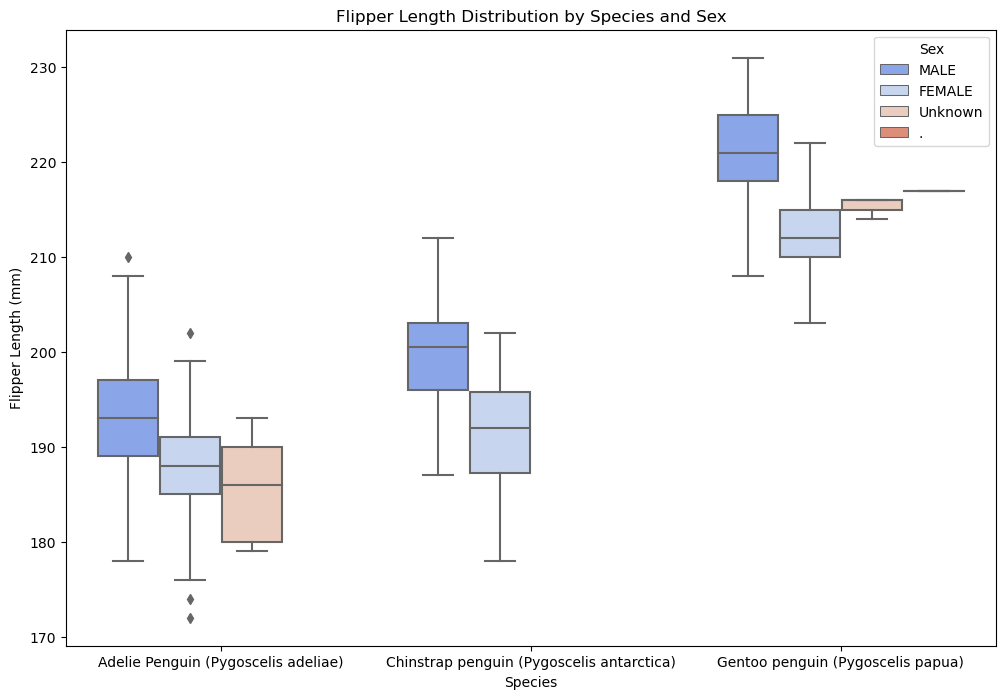

In [20]:
plt.figure(figsize=(12, 8))
sns.boxplot(
    data=df,
    x="Species",
    y="Flipper Length (mm)",
    hue="Sex",
    palette="coolwarm"
)
plt.title("Flipper Length Distribution by Species and Sex")
plt.xlabel("Species")
plt.ylabel("Flipper Length (mm)")
plt.legend(title="Sex")
plt.show()

### Handling Unexpected Value

Oops! There’s something strange—the appearance of a fourth gender in the legend.

It seems that there are unexpected values (in this case, "`.`") in addition to `MALE`, `FEMALE`, and `Unknown`.

To fix this, let’s replace the unexpected value with `Unknown`:

In [23]:
df['Sex'] = df['Sex'].replace(['.'], 'Unknown')
print(df['Sex'].unique()) ## check if there is any remaining unexpected value

['MALE' 'FEMALE' 'Unknown']


And we can visualize the data again:

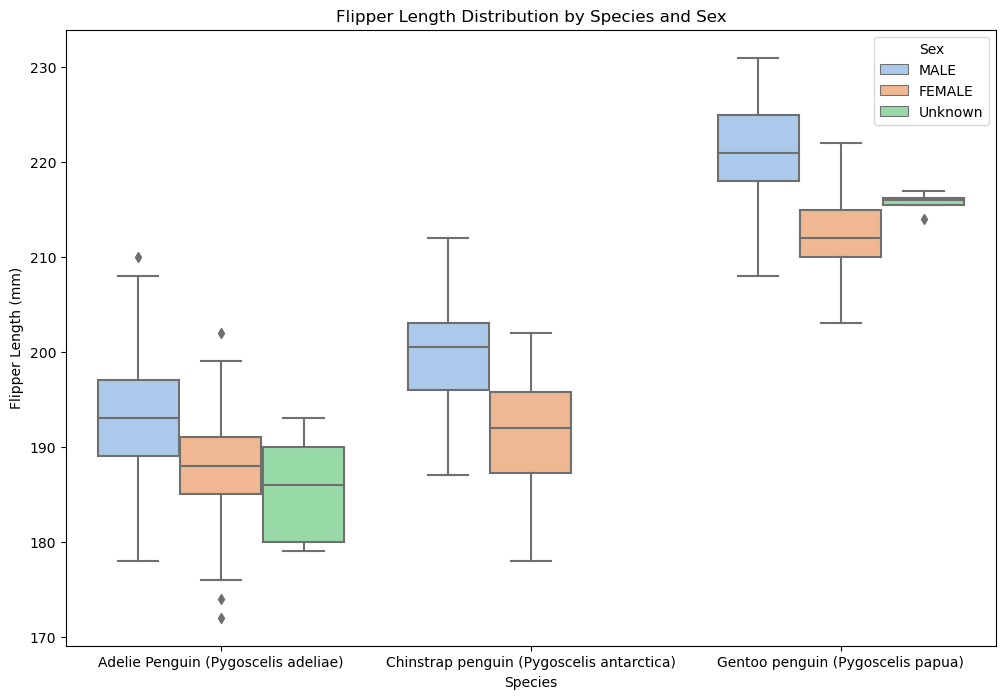

In [25]:
plt.figure(figsize=(12, 8))
sns.boxplot(
    data=df,
    x="Species",
    y="Flipper Length (mm)",
    hue="Sex",
    palette="pastel" # We can change the color style in any way we want!
)
plt.title("Flipper Length Distribution by Species and Sex")
plt.xlabel("Species")
plt.ylabel("Flipper Length (mm)")
plt.legend(title="Sex")
plt.show()

Voila! Now, we can easily tell information such as:

1. Gentoo penguins have significantly longer flippers than Adelie and Chinstrap penguins.
2. Male penguins tend to have longer flippers than females.

This is fun! In a similar way, we can create various kinds of visualizations for the data we’re interested in.

***Knowing penguins better through pandas!***